In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/long.csv')
df

,branch,menu,units
0,Bangkok,mocha,365
1,Phuket,mocha,70
2,Pattaya,mocha,350
3,Tak,mocha,450
4,Bangkok,latte,160
5,Phuket,latte,330
6,Pattaya,latte,305
7,Tak,latte,85
8,Bangkok,espresso,435
9,Phuket,espresso,245


In [3]:
df.pivot_table(index='branch', columns='menu', values='units', aggfunc='sum', margins=True)

menu,espresso,latte,mocha,All
branch,,,,
Bangkok,435,160,365,960
Pattaya,160,305,350,815
Phuket,245,330,70,645
Tak,80,85,450,615
All,920,880,1235,3035


In [4]:
df.groupby(['branch', 'menu']).sum()

units
branch  menu           
Bangkok espresso    435
        latte       160
        mocha       365
Pattaya espresso    160
        latte       305
        mocha       350
Phuket  espresso    245
        latte       330
        mocha        70
Tak     espresso     80
        latte        85
        mocha       450

In [16]:
pd.crosstab(df.branch, df.menu, values=df.units, aggfunc='sum', margins=True)

menu,espresso,latte,mocha,All
branch,,,,
Bangkok,435,160,365,960
Pattaya,160,305,350,815
Phuket,245,330,70,645
Tak,80,85,450,615
All,920,880,1235,3035


## Multi index

In [6]:
df2 = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/long2.csv')
df2

,branch,period,menu,units
0,Bangkok,2015,mocha,215
1,Phuket,2015,mocha,280
2,Pattaya,2015,mocha,265
3,Tak,2015,mocha,355
4,Bangkok,2016,mocha,480
5,Phuket,2016,mocha,155
6,Pattaya,2016,mocha,225
7,Tak,2016,mocha,425
8,Bangkok,2017,mocha,410
9,Phuket,2017,mocha,175


In [7]:
df2 = df2.pivot_table(index=['branch', 'period'], columns='menu', values='units')

In [8]:
df2

menu            espresso  latte  mocha
branch  period                        
Bangkok 2015         455    390    215
        2016         140    115    480
        2017         190    300    410
Pattaya 2015         355    400    265
        2016         250    435    225
        2017         360    425    140
Phuket  2015         490    475    280
        2016          30    450    155
        2017         380    320    175
Tak     2015         320    340    355
        2016         235    365    425
        2017         135    165    240

In [9]:
df2.groupby('branch').describe().T

branch             Bangkok     Pattaya      Phuket         Tak
menu                                                          
espresso count    3.000000    3.000000    3.000000    3.000000
         mean   261.666667  321.666667  300.000000  230.000000
         std    169.287724   62.115484  240.208243   92.601296
         min    140.000000  250.000000   30.000000  135.000000
         25%    165.000000  302.500000  205.000000  185.000000
         50%    190.000000  355.000000  380.000000  235.000000
         75%    322.500000  357.500000  435.000000  277.500000
         max    455.000000  360.000000  490.000000  320.000000
latte    count    3.000000    3.000000    3.000000    3.000000
         mean   268.333333  420.000000  415.000000  290.000000
         std    140.208179   18.027756   83.216585  108.972474
         min    115.000000  400.000000  320.000000  165.000000
         25%    207.500000  412.500000  385.000000  252.500000
         50%    300.000000  425.000000  450.000000  340.000000
         75%    345.000000  430.000000  462.500000  352.500000
         max    390.000000  435.000000  475.000000  365.000000
mocha    count    3.000000    3.000000    3.000000    3.000000
         mean   368.333333  210.000000  203.333333  340.000000
         std    137.325647   63.835727   67.144124   93.407708
         min    215.000000  140.000000  155.000000  240.000000
         25%    312.500000  182.500000  165.000000  297.500000
         50%    410.000000  225.000000  175.000000  355.000000
         75%    445.000000  245.000000  227.500000  390.000000
         max    480.000000  265.000000  280.000000  425.000000

branch
Bangkok    AxesSubplot(0.125,0.125;0.775x0.755)
Pattaya    AxesSubplot(0.125,0.125;0.775x0.755)
Phuket     AxesSubplot(0.125,0.125;0.775x0.755)
Tak        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

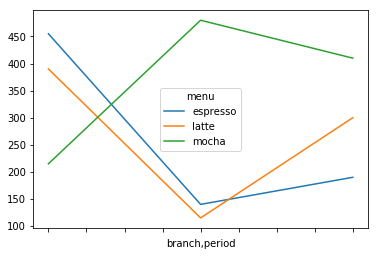

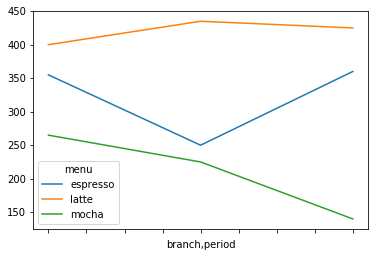

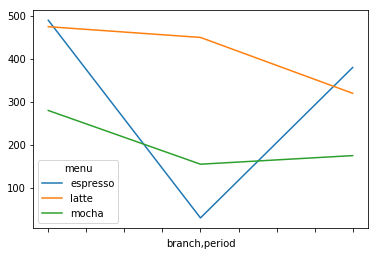

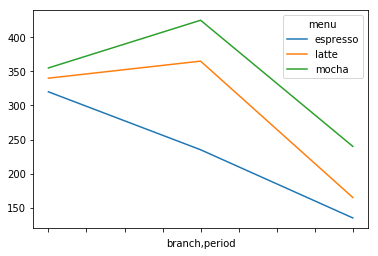

In [10]:
df2.groupby('branch').plot()

period
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

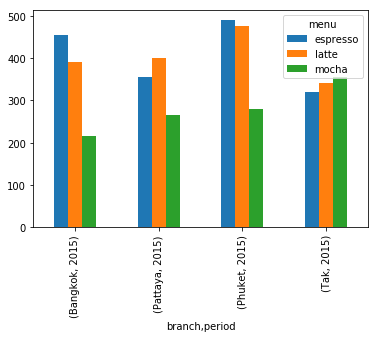

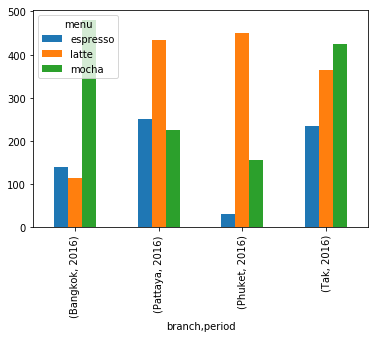

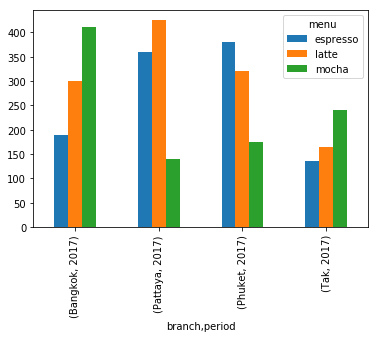

In [11]:
df2.groupby('period').plot.bar()

In [12]:
pd.

SyntaxError: invalid syntax (<ipython-input-12-bc888235687a>, line 1)